In [1]:
import numpy
import py_entropy
from matplotlib import pyplot
import scipy.stats
from tqdm.notebook import tqdm
import os


pyplot.rcParams.update({
  "text.usetex": True,
  "font.family": "Helvetica"
})

In [2]:
output_dir = "neelstate_and_density"

os.makedirs(output_dir, exist_ok=True)

In [3]:
%%time

k = 10000
ne = 1000
ls = 2*numpy.arange(1,9)

filename = os.path.join(output_dir, f"neel_state_newdens.npz")

if os.path.exists(filename):
    arr = numpy.load(filename)
    ls = arr['ls']
    pure_purities = arr['data']
    hilbert_space_sizes = arr['Ds']
    all_densities = []
    for l in ls:
        all_densities.append(arr[f'dens_{l}'])
else:
    all_purities = []
    all_densities = []
    hilbert_space_sizes = []
    for l in tqdm(ls):
        s = py_entropy.MultiDefectState([numpy.arange(0,l,2)], numpy.array([1.0], dtype=numpy.complex128), l, l//2, num_experiments=ne)
        initial_purity = s.get_mean_purity()
        initial_density = s.get_density()
        print(initial_density)
        purities, densities = s.apply_alternative_layers_and_save_mean_purity_and_density(k)
        purities = numpy.vstack([initial_purity, densities])
        densities = numpy.vstack([initial_density, densities])
        D = len(s.get_enumerated_states())
        all_purities.append(purities)
        all_densities.append(densities)
        hilbert_space_sizes.append(D)
    hilbert_space_sizes = numpy.array(hilbert_space_sizes)
    pure_purities = numpy.array(all_purities)
    kwargs = {}
    for l,p in zip(ls, all_densities):
        kwargs[f'dens_{l}'] = numpy.array(p)
    numpy.savez(filename, data=pure_purities, ls=ls, Ds=hilbert_space_sizes, **kwargs)

CPU times: user 4.67 ms, sys: 5.25 ms, total: 9.92 ms
Wall time: 9.48 ms


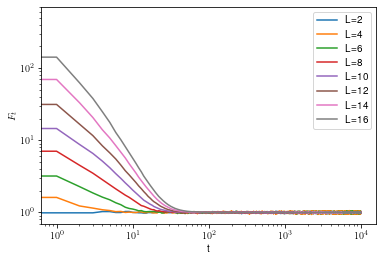

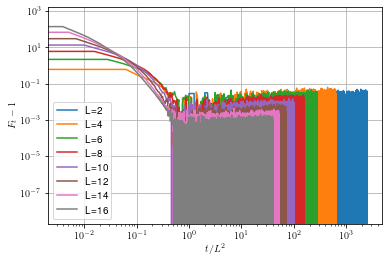

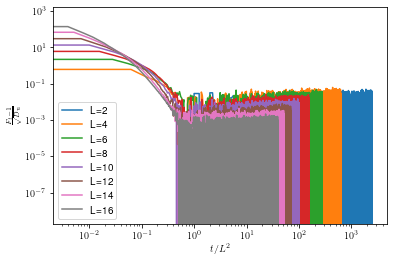

In [4]:
for l, purity in zip(ls, pure_purities):
    pyplot.plot(purity, label=f"L={l}")
    
pyplot.xlabel('t')
pyplot.ylabel('$F_t$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

for l, purity in zip(ls, pure_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), purity - 1, label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel('$F_t - 1$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.grid()
pyplot.savefig(os.path.join(output_dir, "neel_purities.pdf"))
pyplot.show()


for d, l, purity in zip(hilbert_space_sizes, ls, pure_purities):
    pyplot.plot(numpy.arange(len(purity))/(l**2), (purity - 1), label=f"L={l}")
    
pyplot.xlabel('$t/L^2$')
pyplot.ylabel(r'$\frac{F_t - 1}{\sqrt{D_n}}$')
pyplot.xscale('log')
pyplot.yscale('log')
pyplot.legend()
pyplot.show()

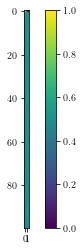

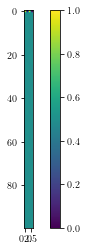

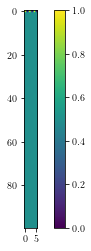

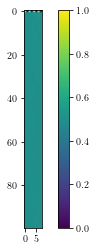

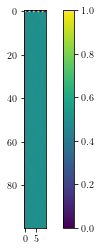

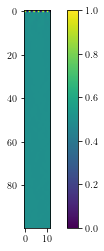

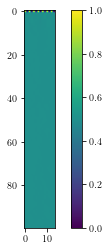

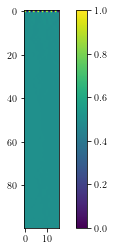

In [7]:
for l, dens in zip(ls, all_densities):
    pyplot.imshow(dens[:100,:])
    pyplot.colorbar()
    pyplot.show()